In [1]:
!pip install gdown
!gdown --id 15kGgL0GGkzZdUzlJZwayDzHA7HZ9hoqW --output /content/newsData.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15kGgL0GGkzZdUzlJZwayDzHA7HZ9hoqW
To: /content/newsData.zip
100% 2.21M/2.21M [00:00<00:00, 136MB/s]


In [79]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install customized_konlpy

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
g++ is already the newest version (4:11.2.0-1ubuntu1).
openjdk-8-jdk is already the newest version (8u382-ga-1~22.04.1).
0 upgraded, 0 new

In [3]:
!unzip newsData.zip;
!rm newsData.zip

Archive:  newsData.zip
   creating: 0/
  inflating: 0/0000NewsData.txt      
  inflating: 0/0001NewsData.txt      
  inflating: 0/0002NewsData.txt      
  inflating: 0/0003NewsData.txt      
  inflating: 0/0004NewsData.txt      
  inflating: 0/0005NewsData.txt      
  inflating: 0/0006NewsData.txt      
  inflating: 0/0007NewsData.txt      
  inflating: 0/0008NewsData.txt      
  inflating: 0/0009NewsData.txt      
  inflating: 0/0010NewsData.txt      
  inflating: 0/0011NewsData.txt      
  inflating: 0/0012NewsData.txt      
  inflating: 0/0013NewsData.txt      
  inflating: 0/0014NewsData.txt      
  inflating: 0/0015NewsData.txt      
  inflating: 0/0016NewsData.txt      
  inflating: 0/0017NewsData.txt      
  inflating: 0/0018NewsData.txt      
  inflating: 0/0019NewsData.txt      
  inflating: 0/0020NewsData.txt      
  inflating: 0/0021NewsData.txt      
  inflating: 0/0022NewsData.txt      
  inflating: 0/0023NewsData.txt      
  inflating: 0/0024NewsData.txt      
  inflating

In [4]:
from google.colab import files
myfile = files.upload()

In [71]:
import pandas as pd
import re
from konlpy.tag import  Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
from collections import Counter

okt = Okt()

ModuleNotFoundError: ignored

In [6]:
import glob

policy_list = sorted(glob.glob('/content/0/*'))
economy_list = sorted(glob.glob('/content/1/*'))
social_list = sorted(glob.glob('/content/2/*'))
culture_list = sorted(glob.glob('/content/3/*'))
international_list = sorted(glob.glob('/content/4/*'))
science_list = sorted(glob.glob('/content/5/*'))
ENT_list = sorted(glob.glob('/content/6/*'))
sports_list = sorted(glob.glob('/content/7/*'))

In [7]:
print(len(policy_list))
print(len(economy_list))
print(len(social_list))
print(len(culture_list))
print(len(international_list))
print(len(science_list))
print(len(ENT_list))
print(len(sports_list))

200
200
200
200
200
200
200
200


In [8]:
print(policy_list[:10])
print(economy_list[:10])

['/content/0/0000NewsData.txt', '/content/0/0001NewsData.txt', '/content/0/0002NewsData.txt', '/content/0/0003NewsData.txt', '/content/0/0004NewsData.txt', '/content/0/0005NewsData.txt', '/content/0/0006NewsData.txt', '/content/0/0007NewsData.txt', '/content/0/0008NewsData.txt', '/content/0/0009NewsData.txt']
['/content/1/1000NewsData.txt', '/content/1/1001NewsData.txt', '/content/1/1002NewsData.txt', '/content/1/1003NewsData.txt', '/content/1/1004NewsData.txt', '/content/1/1005NewsData.txt', '/content/1/1006NewsData.txt', '/content/1/1007NewsData.txt', '/content/1/1008NewsData.txt', '/content/1/1009NewsData.txt']


In [9]:
Newdata = policy_list + economy_list + social_list + culture_list + international_list + science_list + ENT_list + sports_list
Newdata

['/content/0/0000NewsData.txt',
 '/content/0/0001NewsData.txt',
 '/content/0/0002NewsData.txt',
 '/content/0/0003NewsData.txt',
 '/content/0/0004NewsData.txt',
 '/content/0/0005NewsData.txt',
 '/content/0/0006NewsData.txt',
 '/content/0/0007NewsData.txt',
 '/content/0/0008NewsData.txt',
 '/content/0/0009NewsData.txt',
 '/content/0/0010NewsData.txt',
 '/content/0/0011NewsData.txt',
 '/content/0/0012NewsData.txt',
 '/content/0/0013NewsData.txt',
 '/content/0/0014NewsData.txt',
 '/content/0/0015NewsData.txt',
 '/content/0/0016NewsData.txt',
 '/content/0/0017NewsData.txt',
 '/content/0/0018NewsData.txt',
 '/content/0/0019NewsData.txt',
 '/content/0/0020NewsData.txt',
 '/content/0/0021NewsData.txt',
 '/content/0/0022NewsData.txt',
 '/content/0/0023NewsData.txt',
 '/content/0/0024NewsData.txt',
 '/content/0/0025NewsData.txt',
 '/content/0/0026NewsData.txt',
 '/content/0/0027NewsData.txt',
 '/content/0/0028NewsData.txt',
 '/content/0/0029NewsData.txt',
 '/content/0/0030NewsData.txt',
 '/conte

In [10]:
# 여러 파일을 하나의 파일로 병합하기
# Newdata_list = ['/content/0/0000NewsData.txt', '/content/0/0001NewsData.txt', '/content/0/0002NewsData.txt']

# with open('merge.txt', 'w') as outfile:
#     for filename in Newdata_list:
#         with open(filename, 'r') as file:
#             outfile.write(file.read())

In [11]:
with open('/content/0/0001NewsData.txt', 'r', encoding='utf-8') as Newdata:
    lines = Newdata.readlines()
    print(lines)

['예결위, 추경 막바지 심사 진통…여야 충돌\t(서울=연합뉴스) 김남권 기자 = 국회 예산결산특별위원회는 19일 추가경정예산안의 막바지 심사에 돌입했으나 여야 간 이견에 진통을 겪고 있다. \n', '\n', '예결위는 이날 오전 8시 소소위원회를 열고 전날까지 심사에서 보류된 사업 53건의 감액 심사를 했다. \n', '\n', '여야 4개 교섭단체의 예결위 간사들만 참석하는 소소위는 심사한 지 한 시간 만에 여야 간 충돌로 정회했다. \n', '\n', '자유한국당 예결위 간사인 김도읍 의원은 "감액할 사업이 많은데 현재 소소위가 정회된 상태"라고 말했다.\n', '\n', '예결위는 소소위에서의 감액 심사 완료 및 증액 작업 등을 거쳐 수정된 추경안을 전체회의에 올릴 예정이었으나, 현재로서는 전체회의 개의 및 상정 전망이 불투명한 상태다. \n', '\n', '여야는 예결위 전체회의를 거쳐 이날 오후 9시 국회 본회의에서 추경안을 처리하기로 합의한 상태다. 다만 예결위 전체회의가 불발될 경우 본회의에서의 추경안 처리는 어려워질 수 있다.']


In [33]:
policy_lst = []

for file_path in policy_list:
    with open(file_path, 'r') as file:
        policy_lst.append(file.read())

policy_df = pd.DataFrame({'content': policy_lst, 'label': 0})

print(policy_df)

                                               content  label
0    동남아 담당' 北 최희철 부상 베이징 도착…싱가포르행 주목\t최 부상, 행선지·방문...      0
1    예결위, 추경 막바지 심사 진통…여야 충돌\t(서울=연합뉴스) 김남권 기자 = 국회...      0
2    외압 논란·항명 사태…산 넘고 물 건넌 권성동 영장 청구\t안미현 검사 외압 폭로 ...      0
3    친문 홍영표, 문빠에 찍혔다…특검 합의에 문자폭탄 공격\t대표적인 친(親)문재인계인...      0
4    北, 연일 南비난…韓美정상회담 전 경고성 메시지 발신\t南, 맥스선더·태영호 등 불...      0
..                                                 ...    ...
195  경찰 "드루킹 일당, 댓글 2만여개 매크로 조작 추가 확인"(종합)\t1월17∼18...      0
196  홍문표 “판문점 선언, 국민들 몰라”vs김어준 “인터넷에 다 있는데…”\t[동아닷컴...      0
197  여야, 국회정상화 협상재개…특검 등 일괄타결 논의 전망\t정 의장 '8일 오후 2시...      0
198  이완구, 단식 김성태 찾아 "與, 정국 풀 명분 줘야"\t【서울=뉴시스】홍지은 기자...      0
199  민주-한국, 의석수 불과 3개 차이...재보궐선거 '빅뱅'\t오는 6월 13일 지방...      0

[200 rows x 2 columns]


In [35]:
economy_lst = []

for file_path in economy_list:
    with open(file_path, 'r') as file:
        economy_lst.append(file.read())

economy_df = pd.DataFrame({'content': economy_lst, 'label': 1})

print(economy_df)

                                               content  label
0    [뒤끝뉴스] 한달 새 두 번이나 LG 연구단지에 간 대통령\t국민이 선출한 일국의 ...      1
1    "주유소 가기 무섭다"…휘발유 가격 근 3년만에 최고치\t한주만에 ℓ당 12.9원 ...      1
2    ‘산타페’에 도전장 에퀴녹스 6월 출시…가격은\t한국지엠주식회사가 전략 신차 '이쿼...      1
3    코인' 관리 들어선 中, 사기성 암호화폐 421개 적발\t中 IFCERT, 사기 암...      1
4    "노동시간 단축 최저임금보다 경제파급력 크다"\t"노동시간 단축 최저임금보다 경제파...      1
..                                                 ...    ...
195  골드만삭스發 훈풍에 1만달러 목전… 비트코인 과거 영광 되찾을까\t1000만원·90...      1
196  비트코인이 당분간 상승할 수밖에 없는 이유 3가지\t(서울=뉴스1) 박형기 기자 =...      1
197  [단독] 신임 금감원장에 윤석헌 교수 내정\t[한겨레] 신임 금융감독원장에 윤석헌(...      1
198  가공식품 가격 줄줄이 올라…포카리스웨트·데미소다 최대 20%↑\t(서울=연합뉴스) ...      1
199  대한항공 직원들 오늘 촛불집회…시민도 수백명 함께할 듯\t주최측 100명 신고·경찰...      1

[200 rows x 2 columns]


In [36]:
social_lst = []

for file_path in social_list:
    with open(file_path, 'r') as file:
        social_lst.append(file.read())

social_df = pd.DataFrame({'content': social_lst, 'label': 2})

print(social_df)

                                               content  label
0    9급 공무원에 몰린 21만 명…수험생 피말린 24시\t오늘 서울을 제외한 전국에서 ...      2
1    근로자 4명 추락사' 고속도로 교량 시설물 불량시공 정황(종합)\t노동청 "앵커볼트...      2
2    "항명파동은 봉합했지만"… 커지는 '검찰 인사 후폭풍' 우려\t7~8월 정기인사 맞...      2
3    어른 행세 '30대 외모' 학생에 속아 담배 판 점주…법원 구제판결\t어른 행세한 ...      2
4    양예원 촬영 참가자 “충격받아 뛰쳐나왔다… 대부분 4·50대” (영상)\t유명 유튜...      2
..                                                 ...    ...
195  블랙박스 ‘광주 쌍촌동 교통사고’ 왜 논란? “저리 갑자기 나오면 어찌 피해” “냉...      2
196  매몰자 1명도 숨져…정선 철광산 매몰사고 사망자 3명으로 늘어\t(정선=연합뉴스) ...      2
197  운반 의뢰받은 금괴 빼돌리려다 선수친 아르바이트생에 당해\t서로 속고 속인 막장극…...      2
198  단역배우 자매 사건' 피고소인들, 자매 모친에 억대 손배소\t가해 의혹 관련자 3명...      2
199  애들 1분도 눈 못 떼는데 … 보육교사 무조건 1시간 쉬라니\t‘돌봄 근로자’ 휴게...      2

[200 rows x 2 columns]


In [37]:
culture_lst = []

for file_path in culture_list:
    with open(file_path, 'r') as file:
        culture_lst.append(file.read())

culture_df = pd.DataFrame({'content': culture_lst, 'label': 3})

print(culture_df)

                                               content  label
0    [날씨] 다소 더운 월요일…큰 일교차, 감기 조심하세요\t[날씨] 다소 더운 월요일...      3
1    생활 주변 방사선은 어쩌나…'알라라 원칙' 기억하세요\t<앵커>\n\n침대에서 기준...      3
2    [여적] 명품백을 든 '말레이판 이멜다'\t1981년 비행기 여행 중이던 영국의 배...      3
3    외국인 백신관광 때문에… 병원마다 ‘가다실 9가’ 품귀\t자궁경부암백신 ‘가다실 9...      3
4    [날씨] 내일 맑고 따뜻…모레 밤부터 전국 비\t날씨 좋다'라는 말이 절로 나올 정...      3
..                                                 ...    ...
195  [단독]9호선 4단계 연장, 이달 안에 결판 난다\t서울시, 예비타당성 통과 위해 ...      3
196  위례 지하철 8호선 속도낸다…올해 첫 삽·내년 말 준공(종합)\t성남시, 실시계획인...      3
197  우리나라 40대 남녀 "재산보다 건강이 더 중요"\tDMC미디어 '40대 소비자의 ...      3
198  햇볕 사용법 따라 팔자가 바뀐다\t이광훈의 家톡 \n(3) 멋진 창문, 때론 독이 ...      3
199  “견과류, 심장에 좋지만 기적의 식품은 아니다”\t[서울경제] 견과류는 심장병 위험...      3

[200 rows x 2 columns]


In [39]:
international_lst = []

for file_path in international_list:
    with open(file_path, 'r') as file:
        international_lst.append(file.read())

international_df = pd.DataFrame({'content': international_lst, 'label': 4})

print(international_df)

                                               content  label
0    NYT "화난 트럼프, '북미회담 계속해야 하나' 측근들 다그쳐"\t"트럼프 불편한...      4
1    그레이엄 의원 "북미회담 실패시 전쟁 ...북한이 패배"\t"전쟁 일어나면 중국 뒷...      4
2    베네수엘라, 마두로 재선 확정…야권 '승복못해'(종합)\t마두로 67.7% 지지율로...      4
3    교황 또 '동성애 포용' 발언…"하느님은 있는 그대로 사랑해"\t사제 아동성추행 폭...      4
4    반쪽대선' 승리 마두로…'노동자 대통령' vs '독재자' 극과극\t버스 기사·노조 ...      4
..                                                 ...    ...
195  트럼프 "북미정상회담 장소·날짜 며칠 내 발표"(종합)\t"가장 중요한 것은 북핵문...      4
196  12시간 노동에 천 원…친환경 전기차에 가려진 아동 착취\t<앵커>\n\n친환경 전...      4
197  아베 "北과 불행한 과거 청산· 국교 정상화 노력"\t"남북정상회담 실현한 文대통령...      4
198  [월드이슈] "출산일 다가오는데…" 성폭행 당한 로힝야족 여성들의 비극\t미얀마 군...      4
199  유엔총장 "북한 '핵실험장 폐쇄' 검증 최대한 지원"\t문 대통령 통화서 적극적 협...      4

[200 rows x 2 columns]


In [40]:
science_lst = []

for file_path in science_list:
    with open(file_path, 'r') as file:
        science_lst.append(file.read())

science_df = pd.DataFrame({'content': science_lst, 'label': 5})

print(science_df)

                                               content  label
0    “갤럭시S9 20만 원대, 아이폰6S 0원!” 모비톡, 가정의 달 이벤트\t'갤럭시...      5
1    LG 그램’, 100만대 판매기념 한정판 나왔다\tLG전자가 ‘그램’ 노트북 누적판...      5
2    “이게 정말 LG폰이에요?”…G7 씽큐, 기분 좋은 스타트\t20일 서울 신촌역 앞...      5
3    애플 "10억불"vs 삼성 "2800만불"…배상액 종지부 '눈앞'\t삼성-애플 '둥...      5
4    삼성전자, 5G 국제 표준 주도한다\t삼성전자가 5세대(5G) 이동통신 1차 표준 ...      5
..                                                 ...    ...
195  네이버, 9일 댓글 추가대책 발표\t전문가 "네이버, 면피성 조치만\n매크로 사용 ...      5
196  갤S9 플러스 출고가 7만7000원 인하 '이례적'\t한달여만에 내려...플래그십 ...      5
197  불법 웹툰 `밤토끼` 극성에 年 2.4조원 피해\t불법 웹툰 사이트 200곳 넘어…...      5
198  애플 따라하면 팔린다…노치 디자인 폰, 올해 3억대 전망\t'애플 따라하기'는 여전...      5
199  "당신이 찍은 사진도 돈이 됩니다"\t'이미지 장터' 4兆 시장 급성장\n\n사진 ...      5

[200 rows x 2 columns]


In [41]:
ENT_lst = []

for file_path in ENT_list:
    with open(file_path, 'r') as file:
        ENT_lst.append(file.read())

ENT_df = pd.DataFrame({'content': ENT_lst, 'label': 6})

print(ENT_df)

                                               content  label
0    [종합]스튜디오 측 "법적 조치 취할 것" VS JYP 측 "법률 자문 구할 것" ...      6
1    [룩@차이나] 추자현, 셀카 올렸을 뿐인데…中웨이보 실검 1위\t[TV리포트=박설이...      6
2    [POP이슈]"성숙해져 올게요"…'軍현역 입대' 고경표, 잠시만 안녕(종합)\t[헤...      6
3    복면가왕' 지세희, 40kg 감량 화제…전혀 다른 비포&애프터\t(서울=뉴스1) 김...      6
4    [POP초점]‘세계 최고 보이그룹’ 방탄소년단, 또다시 입증했다\t[헤럴드POP=고...      6
..                                                 ...    ...
195  백종원♥소유진 아들 용희, 막내 돌보는 자상한 `동생 바보`\t[매일경제 스타투데이...      6
196  숲속집' 박신혜가 전한 소확행, 안방 사로잡은 '행복 매직'\t[OSEN=박진영 기...      6
197  한예슬, 충격 사진 게재→소속사 "의료사고 맞아, 현재 치료 중" (종합)\t[스포...      6
198  인생술집' 하니 "김희철은 내 '키다리 아저씨', 힘들 때 잡아줬다"\t[enews...      6
199  "육군 현역 입대하고 싶다" 고경표, 훌륭한 언행일치 [종합]\t[TV리포트=이우인...      6

[200 rows x 2 columns]


In [42]:
sports_lst = []

for file_path in sports_list:
    with open(file_path, 'r') as file:
        sports_lst.append(file.read())

sports_df = pd.DataFrame({'content': sports_lst, 'label': 7})

print(sports_df)

                                               content  label
0    차명종 서대현 김라희 등 韓7명 호치민3쿠션월드컵 PPPQ통과\tPPQ에 임정완 강...      7
1    정현, 한국 선수 최초로 메이저대회 시드 받는다\tㆍ27일 프랑스오픈서 19번 내외...      7
2    흙 위에서 되찾은 세계 1위\t'클레이코트의 황제' 라파엘 나달(스페인)이 세계랭킹...      7
3    빙상경기연맹 논란'의 진실 밝혀질까…문체부, 23일 감사 결과 발표\t[스포티비뉴스...      7
4    세계최강' 남자 사브르, 마드리드 월드컵 단체전 우승\t[윈터뉴스=김태경 기자] 대...      7
..                                                 ...    ...
195  단일팀 추진' 대한카누연맹, 데상트코리아와 5년 후원 협약\t[스포티비뉴스=조형애 ...      7
196  올림픽 성공 뒷이야기... 서울대, 16일 이희범 평창 조직위원장 초청 특강\t[O...      7
197  21일 개막 호치민3쿠션월드컵에 149명 참가 확정\t韓선수 46명 참가…1차 예선...      7
198  스포츠안전재단, 대축전에 안전필요성 알려\t[스타뉴스 채준 기자]\n\n\n스포츠안...      7
199  조한승 “커피 향 그윽한 30대 바둑 보이겠다”\t[한겨레] 맥심커피배 트로피 시상...      7

[200 rows x 2 columns]


In [43]:
NewData = pd.concat([policy_df, economy_df, social_df, culture_df, international_df, science_df, ENT_df, sports_df])
NewData

,content,label
0,"동남아 담당' 北 최희철 부상 베이징 도착…싱가포르행 주목\t최 부상, 행선지·방문...",0
1,"예결위, 추경 막바지 심사 진통…여야 충돌\t(서울=연합뉴스) 김남권 기자 = 국회...",0
2,외압 논란·항명 사태…산 넘고 물 건넌 권성동 영장 청구\t안미현 검사 외압 폭로 ...,0
3,"친문 홍영표, 문빠에 찍혔다…특검 합의에 문자폭탄 공격\t대표적인 친(親)문재인계인...",0
4,"北, 연일 南비난…韓美정상회담 전 경고성 메시지 발신\t南, 맥스선더·태영호 등 불...",0
...,...,...
195,"단일팀 추진' 대한카누연맹, 데상트코리아와 5년 후원 협약\t[스포티비뉴스=조형애 ...",7
196,"올림픽 성공 뒷이야기... 서울대, 16일 이희범 평창 조직위원장 초청 특강\t[O...",7
197,21일 개막 호치민3쿠션월드컵에 149명 참가 확정\t韓선수 46명 참가…1차 예선...,7
198,"스포츠안전재단, 대축전에 안전필요성 알려\t[스타뉴스 채준 기자]\n\n\n스포츠안...",7


In [44]:
NewData.shape

(1600, 2)

In [45]:
NewData.head()

,content,label
0,"동남아 담당' 北 최희철 부상 베이징 도착…싱가포르행 주목\t최 부상, 행선지·방문...",0
1,"예결위, 추경 막바지 심사 진통…여야 충돌\t(서울=연합뉴스) 김남권 기자 = 국회...",0
2,외압 논란·항명 사태…산 넘고 물 건넌 권성동 영장 청구\t안미현 검사 외압 폭로 ...,0
3,"친문 홍영표, 문빠에 찍혔다…특검 합의에 문자폭탄 공격\t대표적인 친(親)문재인계인...",0
4,"北, 연일 南비난…韓美정상회담 전 경고성 메시지 발신\t南, 맥스선더·태영호 등 불...",0


In [46]:
NewData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1600 non-null   object
 1   label    1600 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.5+ KB


In [106]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(NewData, test_size=0.3)

In [107]:
print(len(train_data))
print(len(test_data))

1120
480


In [108]:
train_data.head()

,content,label
111,"""'채식주의자' 이어 '흰' 영어 번역에도 오류 많아""\t맨부커 최종심 오른 한강 ...",3
32,"대한항공 직원들, 박창진 사무장 제명에 “노조도 갑질…탈퇴한다”\t[한겨레] 15일...",1
43,"고준희 ""근육 펌핑 위해 닭가슴살만 섭취+하루 3번 운동""[화보]\t[마이데일리 =...",6
154,주택담보대출 금리 2달 만에 또 5% 돌파…시장금리 상승 영향\t美 국채금리 상승에...,1
84,"신진서 9단, 이세돌 꺾고 GS칼텍스배 첫 우승\t국내 바둑 랭킹 2위인 '젊은 피...",7


In [109]:
test_data.head()

,content,label
196,"홍문표 “판문점 선언, 국민들 몰라”vs김어준 “인터넷에 다 있는데…”\t[동아닷컴...",0
129,부산 경마장 힐링캠프 “커피한잔 하실래요?”\t[스포츠서울 유인근 선임기자]자칫 딱...,7
13,"영화 '택시운전사' 실제 가족 5·18 옛 묘역서 재회\t힌츠페터 부인, 김사복 씨...",2
67,반격한 김계관\t[한겨레] 6자회담 대표 지낸 외교 전문가\n\n과거 볼턴과 상대하...,0
122,"아이스더비 추진위원회, 강릉서 설명회 개최\t아이스더비 추진위원회가 17일 강릉 관...",7


In [110]:
# 중복 제거를 위한 중복 체크
# 유니크한 value의 개수를 나타냄
train_data['content'].nunique(), train_data['label'].nunique()

(1111, 8)

In [111]:
test_data['content'].nunique(), test_data['label'].nunique()

(476, 8)

In [112]:
train_data.drop_duplicates(subset = ['content'],
                           inplace = True) # document 열에서 중복인 내용이 있다면 중복 제거

In [113]:
test_data.drop_duplicates(subset = ['content'],
                           inplace = True) # document 열에서 중복인 내용이 있다면 중복 제거

<Axes: >

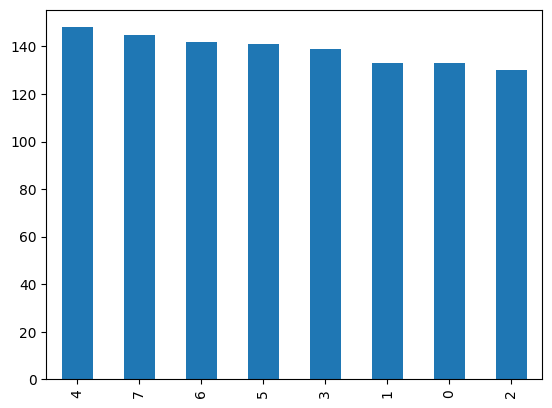

In [114]:
train_data['label'].value_counts().plot(kind = 'bar')

<Axes: >

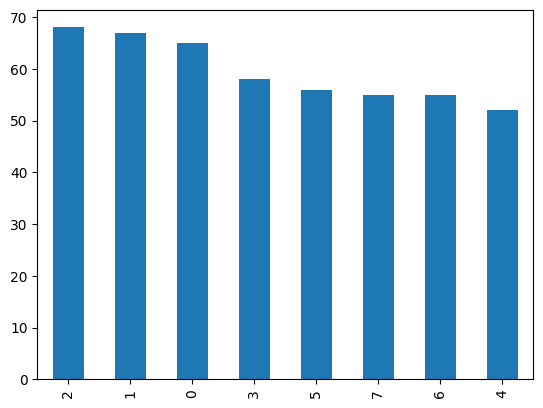

In [115]:
test_data['label'].value_counts().plot(kind = 'bar')

In [116]:
train_data.isnull().sum()

content    0
label      0
dtype: int64

In [117]:
test_data.isnull().sum()

content    0
label      0
dtype: int64

In [120]:
print(train_data.loc[train_data['content'].isnull()])
print(test_data.loc[test_data['content'].isnull()])

Empty DataFrame
Columns: [content, label]
Index: []
Empty DataFrame
Columns: [content, label]
Index: []


In [61]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print('학습용: ', train_data.isnull().values.any())

학습용:  False


In [62]:
test_data = test_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print('학습용: ', test_data.isnull().values.any())

학습용:  False


In [64]:
train_data['content'] = train_data['content'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')
train_data['content']

<ipython-input-64-d5387457242b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['content'] = train_data['content'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')


33     케이블년연장촉구합산규제일몰앞두고막판신경전월임시국회서구체적논의요구음성상품마케팅늘어날것...
140    아찔한파주마장호수흔들다리하루만명씩건넜다개통한달만에방문객만돌파방문객음식값할인파주연합뉴...
57     리얼미터조사대통령지지율소폭하락한도아시아경제유제훈기자문재인대통령의국정수행지지율이전주대...
88     중국철수롯데마트현지직원들고용승계불만일연속시위베이징연합뉴스김진방특파원롯데마트가지난달중...
147    하필지방선거전날북미회담야당엔초대형악재한국당의도개입된날짜선정민주당평화여는역사적계기지방...
                             ...                        
35     뒷문열기서스마트폰먹튀로택시무임승차백태년차택시기사정모씨는최근겪은일을생각하면화가치민다은...
48     상임위측과남북고위급회담조속개최협의한미남북간여러채널통해북미회담준비청와대는일정의용국가안...
153    한국마사회유캔센터찾아가는건전레저캠페인한국마사회가지난일금동대문문화공감센터에서올해번째찾...
126    돈꽃다발돈케이크현금선호뚜렷한어버이날선물새풍경앵커어버이날인오늘부모님께어떤선물하셨습니까...
99     스텔스전투기방공식별구역침입러폭격기긴급요격서울뉴시스유세진기자러시아의베어폭격기대가일현지...
Name: content, Length: 1060, dtype: object

In [65]:
test_data['content'] = test_data['content'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')
test_data['content']

<ipython-input-65-4793ae247e99>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['content'] = test_data['content'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')


116    양주폭발고의사고가능성가스관절단흔적발견종합양주연합뉴스최재훈기자명의목숨을앗아간양주주택가...
185    경필도지사출마공식선언일자리도지사되겠다민선기경기도는일자리소득늘어더행복해질것초강대도시광...
137    홍준표정부얼마나사정했으면지선하루전북미회담지선하루앞북미정상회담한국당복잡한속마음지선악재...
109    의장월세비반납국회파행장기화무한책임서울뉴스최종무기자정세균국회의장이일국회파행장기화에대한...
85     경찰일가족명숨진아파트화재가장이방화결론업무스트레스와부채등으로신변비관해스스로불지른듯부산...
                             ...                        
169    단독유진건강문제로여자플러스하차스포츠월드최정아기자그룹멤버이자배우유진이여자플러스시즌메인...
7      스타일방탄소년단빌보드레드카펫패션구찌로장식스포츠서울석혜란기자방탄소년단이빌보드뮤직어워드...
141    지금처럼잘살겠지김승현한정원월일결혼리포트박귀임기자배우한정원과농구선수출신김승현이월의신랑...
198    스포츠안전재단대축전에안전필요성알려스타뉴스채준기자스포츠안전재단이대축전과장애학생체육대회...
95     리뷰년째가족나혼자전현무와노견또또이야기스포츠서울김대령기자나혼자산다전현무와세반려견또또의...
Name: content, Length: 522, dtype: object

In [66]:
from google.colab import files
myfile = files.upload()

Saving korean_stopword.csv to korean_stopword.csv


In [67]:
k_stopword = pd.read_csv('/content/korean_stopword.csv')
k_stopword.head()

,불용어
0,이
1,있
2,하
3,것
4,들


In [68]:
stopword = list(k_stopword['불용어']) + ['을', '은', '를', '이가', '과', '의', '는', '에']
stopword[:10]

['이', '있', '하', '것', '들', '그', '되', '수', '이', '보']

In [80]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
from ckonlpy.tag import Twitter

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

okt = Twitter()

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [157]:
from tqdm.notebook import tqdm

X_train = []
for i in tqdm(train_data.index):
  morph = okt.morphs(str(train_data.loc[i]['content']))
  temp_X = []
  for txt in morph:
    if txt not in stopword:
      temp_X.append(txt)
  X_train.append(temp_X)
X_train[:5]

  0%|          | 0/1111 [00:00<?, ?it/s]

[['111',
  '"\'',
  '채식주의자',
  "'",
  '이어',
  "'",
  '흰',
  "'",
  '영어',
  '번역',
  '에도',
  '오류',
  '많아',
  '"\\',
  't',
  '맨',
  '부',
  '커',
  '최종',
  '심',
  '오른',
  '한강',
  '...',
  '111',
  '5월',
  '18일',
  '금',
  '경륜',
  ',',
  '나윤',
  '석',
  '삼복',
  '승',
  '왕',
  '가이드',
  '\\',
  't',
  '▲',
  '12',
  '경주',
  '\\',
  'n',
  '\\',
  'n',
  '앞선',
  '기량',
  '협',
  '...',
  '111',
  '[',
  '단독',
  ']',
  '배우',
  '한주완',
  "'",
  '대마초',
  '흡연',
  "'",
  '징역',
  '8',
  '개월',
  '집행유예',
  '2년',
  '\\',
  't',
  '[',
  '아시아',
  '경제',
  '...',
  '111',
  '다주',
  '택',
  '절세',
  '방안',
  '1',
  '순위',
  ',',
  '임대',
  '사업자',
  '등록',
  '늘까',
  '?\\',
  't',
  '[',
  '한겨레',
  ']',
  '‘',
  '8년',
  '이상',
  '임대',
  '’',
  '등록',
  '...',
  '111',
  '판문점',
  '도보',
  '다리',
  '본',
  '딴',
  '듯',
  '’',
  '···',
  '해안가',
  '서',
  '만난',
  '김정은',
  '시진핑',
  '\\',
  't',
  '시진핑',
  '(',
  '習近平',
  ')',
  '...',
  '111',
  '평화',
  '당',
  ',',
  '국회',
  '본회의',
  '참석',
  '…',
  '사직서',
  '처리',
  '정족수',
  '확보',
 

In [158]:
test_data.head()

,content,label
196,"홍문표 “판문점 선언, 국민들 몰라”vs김어준 “인터넷에 다 있는데…”\t[동아닷컴...",0
129,부산 경마장 힐링캠프 “커피한잔 하실래요?”\t[스포츠서울 유인근 선임기자]자칫 딱...,7
13,"영화 '택시운전사' 실제 가족 5·18 옛 묘역서 재회\t힌츠페터 부인, 김사복 씨...",2
67,반격한 김계관\t[한겨레] 6자회담 대표 지낸 외교 전문가\n\n과거 볼턴과 상대하...,0
122,"아이스더비 추진위원회, 강릉서 설명회 개최\t아이스더비 추진위원회가 17일 강릉 관...",7


In [159]:
# 빈 샘플 제거
drop_train = []
for index, sentence in enumerate(X_train):
  if len(sentence) < 1:
    drop_train.append(index)
drop_train[:3]

[]

In [160]:
y_train = np.array(train_data['label'])
y_train[:6]

array([3, 1, 6, 1, 7, 4])

In [161]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

1111
1111


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [162]:
X_train.shape

(1111,)

In [164]:
from tqdm.notebook import tqdm

X_test = []
for i in tqdm(test_data.index):
  morph = okt.morphs(str(test_data.loc[i]['content']))
  temp_X = []
  for txt in morph:
    if txt not in stopword:
      temp_X.append(txt)
  X_test.append(temp_X)
X_test[:5]

  0%|          | 0/476 [00:00<?, ?it/s]

[['196',
  '홍문표',
  '“',
  '판문점',
  '선언',
  ',',
  '국민',
  '몰라',
  '”',
  'vs',
  '김어준',
  '“',
  '인터넷',
  '다',
  '있는데',
  '…',
  '”',
  '\\',
  't',
  '[',
  '동아닷컴',
  '...',
  '196',
  '숲속',
  "'",
  '박신혜',
  '소',
  '확행',
  ',',
  '안방',
  '사로잡은',
  "'",
  '행복',
  '매직',
  "'\\",
  't',
  '[',
  'OSEN',
  '=',
  '박진영',
  '기',
  '...',
  '196',
  '위례',
  '지하철',
  '8',
  '호선',
  '속도',
  '낸다',
  '…',
  '올해',
  '첫',
  '삽',
  '·',
  '내년',
  '준공',
  '(',
  '종합',
  ')\\',
  't',
  '성남시',
  ',',
  '실시',
  '계획',
  '인',
  '...',
  'Name',
  ':',
  'content',
  ',',
  'dtype',
  ':',
  'object'],
 ['부산',
  '경마장',
  '힐링캠프',
  '“',
  '커피한잔',
  '하실래요',
  '?',
  '”',
  '[',
  '스포츠서울',
  '유인근',
  '선임',
  '기자',
  ']',
  '자칫',
  '딱딱할',
  '있는',
  '경마',
  '즐거운',
  '활력소',
  '찾아온다',
  '.',
  '렛츠런',
  '파크',
  '부산',
  '경남',
  '지친',
  '고객',
  '들의',
  '마음',
  '달래',
  '줄',
  '새',
  '로운',
  '예능',
  '토크쇼',
  '야심',
  '차게',
  '오픈',
  '했다',
  '.',
  '‘',
  '경마',
  ',',
  '커피',
  '잔',
  '’',
  '으로',
  ',',
  '경마',
  '

In [165]:
# 빈 샘플 제거
drop_test = []
for index, sentence in enumerate(X_test):
  if len(sentence) < 1:
    drop_test.append(index)
drop_test[:3]

[]

In [166]:
y_test = np.array(test_data['label'])
y_test[:6]

array([0, 7, 2, 0, 7, 7])

In [167]:
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

476
476


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [168]:
X_test[0:5]

array([list(['196', '홍문표', '“', '판문점', '선언', ',', '국민', '몰라', '”', 'vs', '김어준', '“', '인터넷', '다', '있는데', '…', '”', '\\', 't', '[', '동아닷컴', '...', '196', '숲속', "'", '박신혜', '소', '확행', ',', '안방', '사로잡은', "'", '행복', '매직', "'\\", 't', '[', 'OSEN', '=', '박진영', '기', '...', '196', '위례', '지하철', '8', '호선', '속도', '낸다', '…', '올해', '첫', '삽', '·', '내년', '준공', '(', '종합', ')\\', 't', '성남시', ',', '실시', '계획', '인', '...', 'Name', ':', 'content', ',', 'dtype', ':', 'object']),
       list(['부산', '경마장', '힐링캠프', '“', '커피한잔', '하실래요', '?', '”', '[', '스포츠서울', '유인근', '선임', '기자', ']', '자칫', '딱딱할', '있는', '경마', '즐거운', '활력소', '찾아온다', '.', '렛츠런', '파크', '부산', '경남', '지친', '고객', '들의', '마음', '달래', '줄', '새', '로운', '예능', '토크쇼', '야심', '차게', '오픈', '했다', '.', '‘', '경마', ',', '커피', '잔', '’', '으로', ',', '경마', '스포츠', '주인공', '인', '기수', '조교사', '매주', '다양', '게스트', '초대', '자유', '롭', '게', '경마', '관해', '이야기', '나누는', '토크쇼', '다', '.', '실제', '경주마', '들이', '있는', '마방', '근처', '들판', '에서', '진행자', '게스트', '(', '기수', ',', '조교사', ')', '커피', '한잔', '하며

In [169]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'t': 1, '...': 2, '\\': 3, ',': 4, "'": 5, '[': 6, ':': 7, '"': 8, '…': 9, ']': 10, 'n': 11, '=': 12, 'name': 13, 'content': 14, 'dtype': 15, 'object': 16, '(': 17, '"\\': 18, '·': 19, '기자': 20, '‘': 21, '서울': 22, '종합': 23, ')': 24, '“': 25, '1': 26, '’': 27, ')\\': 28, '서': 29, '뉴스': 30, '”': 31, ']\\': 32, '2': 33, '앵커': 34, '연합뉴스': 35, '3': 36, '한국': 37, '…"': 38, '대': 39, '으로': 40, '단독': 41, "'\\": 42, '-': 43, '삼성': 44, '기': 45, '위': 46, '?\\': 47, '9': 48, '【': 49, '4': 50, '만에': 51, '에서': 52, '北': 53, '6': 54, '<': 55, '뉴시스': 56, '다': 57, '】': 58, '→': 59, '5': 60, '회담': 61, '中': 62, '>\\': 63, '첫': 64, '인': 65, '머니투데이': 66, 'lg': 67, '트럼프': 68, '배': 69, '자': 70, '"(': 71, '논란': 72, '7': 73, '스타': 74, '"…': 75, 'tv': 76, '경제': 77, '..': 78, '美': 79, '장': 80, '스포츠': 81, '북미': 82, '만': 83, '부산': 84, '수사': 85, '24': 86, '세': 87, "…'": 88, '달': 89, '?': 90, '\\...': 91, '새': 92, '당': 93, '아이': 94, '30': 95, '대통령': 96, '8': 97, '20': 98, '신문': 99, '연구': 100, '못': 101, "'…": 102, '아시

In [170]:
len(tokenizer.word_index)

6477

In [171]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  # 단어의 등장 빈도수가 threshold보다 작으면
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

In [172]:
print('단어 집한(vocabulary)의 크기: ', total_cnt)
print('등장 빈도가 %s번 이하인 회귀 단어의 수: %s' %(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율: ', (rare_cnt / total_cnt) * 100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율: ', (rare_freq / total_freq) * 100)

단어 집한(vocabulary)의 크기:  6477
등장 빈도가 2번 이하인 회귀 단어의 수: 11
단어 집합에서 희귀 단어의 비율:  0.16983171221244403
전체 등장 빈도에서 희귀 단어 등장 빈도 비율:  0.014824997641477648


In [173]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거
# 0번 패딩 토큰과 1번 oov 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기:', vocab_size)

단어 집합의 크기: 6468


In [174]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train[:3]

[[535,
  244,
  3958,
  6,
  367,
  6,
  1966,
  6,
  1967,
  3959,
  207,
  3960,
  1392,
  19,
  2,
  1096,
  430,
  643,
  644,
  784,
  704,
  1785,
  3,
  535,
  381,
  406,
  213,
  416,
  5,
  3961,
  1283,
  3962,
  593,
  1558,
  3963,
  4,
  2,
  3964,
  126,
  944,
  4,
  12,
  4,
  12,
  3965,
  3966,
  2578,
  3,
  535,
  7,
  42,
  11,
  360,
  2241,
  6,
  1559,
  1144,
  6,
  407,
  98,
  139,
  1654,
  296,
  4,
  2,
  7,
  104,
  78,
  3,
  535,
  3967,
  1097,
  3968,
  1968,
  27,
  3969,
  5,
  1969,
  1560,
  1039,
  2242,
  48,
  2,
  7,
  108,
  11,
  22,
  1203,
  489,
  1969,
  28,
  1039,
  3,
  535,
  382,
  1786,
  594,
  755,
  3970,
  137,
  28,
  275,
  3971,
  30,
  1970,
  169,
  505,
  4,
  2,
  505,
  18,
  3972,
  25,
  3,
  535,
  276,
  94,
  5,
  150,
  506,
  1971,
  10,
  995,
  945,
  3973,
  1474,
  785,
  4,
  2,
  3974,
  9,
  2579,
  151,
  3,
  14,
  8,
  15,
  5,
  16,
  8,
  17],
 [507,
  946,
  107,
  5,
  4990,
  4991,
  4992,
  26,
 

In [175]:
print(tokenizer.word_index)

{'OOV': 1, 't': 2, '...': 3, '\\': 4, ',': 5, "'": 6, '[': 7, ':': 8, '"': 9, '…': 10, ']': 11, 'n': 12, '=': 13, 'name': 14, 'content': 15, 'dtype': 16, 'object': 17, '(': 18, '"\\': 19, '·': 20, '기자': 21, '‘': 22, '서울': 23, '종합': 24, ')': 25, '“': 26, '1': 27, '’': 28, ')\\': 29, '서': 30, '뉴스': 31, '”': 32, ']\\': 33, '2': 34, '앵커': 35, '연합뉴스': 36, '3': 37, '한국': 38, '…"': 39, '대': 40, '으로': 41, '단독': 42, "'\\": 43, '-': 44, '삼성': 45, '기': 46, '위': 47, '?\\': 48, '9': 49, '【': 50, '4': 51, '만에': 52, '에서': 53, '北': 54, '6': 55, '<': 56, '뉴시스': 57, '다': 58, '】': 59, '→': 60, '5': 61, '회담': 62, '中': 63, '>\\': 64, '첫': 65, '인': 66, '머니투데이': 67, 'lg': 68, '트럼프': 69, '배': 70, '자': 71, '"(': 72, '논란': 73, '7': 74, '스타': 75, '"…': 76, 'tv': 77, '경제': 78, '..': 79, '美': 80, '장': 81, '스포츠': 82, '북미': 83, '만': 84, '부산': 85, '수사': 86, '24': 87, '세': 88, "…'": 89, '달': 90, '?': 91, '\\...': 92, '새': 93, '당': 94, '아이': 95, '30': 96, '대통령': 97, '8': 98, '20': 99, '신문': 100, '연구': 101, '못': 102, "'

In [176]:
print('리뷰의 평균 길이: ', sum(map(len, X_train)) / len(X_train))

리뷰의 평균 길이:  133.57155715571557


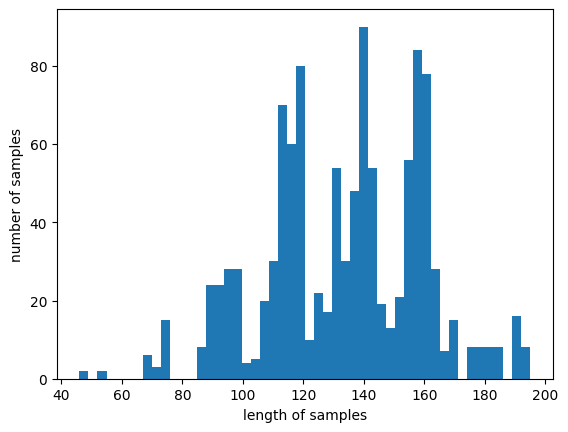

In [177]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [178]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
      cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' %(max_len, (cnt / len(nested_list)) * 100))

In [179]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen = 30)
X_train[:3]

array([[3972,   25,    3,  535,  276,   94,    5,  150,  506, 1971,   10,
         995,  945, 3973, 1474,  785,    4,    2, 3974,    9, 2579,  151,
           3,   14,    8,   15,    5,   16,    8,   17],
       [  63,  732,    5, 1395, 1286,  676,   65, 1972,   10, 1287, 2428,
         417,    4,    2,  706, 5000,   66, 1288,  124,  298,   10,  124,
           3,   14,    8,   15,    5,   16,    8,   17],
       [   3,  317, 2976, 1792, 2977, 1661, 1147,  610,  147,  623,   18,
         101,   29,    2,  418,  137, 2978,   53, 2979,  947,    5, 2980,
           3,   14,    8,   15,    5,   16,    8,   17]], dtype=int32)

In [180]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = 30)
X_test.shape

(476, 30)

In [181]:
vocab_size

6468

In [196]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [206]:
model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim = 32))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(8, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [207]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          206976    
                                                                 
 lstm_12 (LSTM)              (None, None, 64)          24832     
                                                                 
 lstm_13 (LSTM)              (None, None, 64)          33024     
                                                                 
 lstm_14 (LSTM)              (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
Total params: 277,512
Trainable params: 277,512
Non-trainable params: 0
_________________________________________________________________


In [208]:
history = model.fit(X_train, y_train,
                    batch_size = 32, epochs = 10,
                    validation_split = 0.2)

Epoch 1/10
28/28 [==============================] - 13s 182ms/step - loss: 2.0811 - acc: 0.1194 - val_loss: 2.0818 - val_acc: 0.1031
Epoch 2/10
28/28 [==============================] - 2s 66ms/step - loss: 2.0793 - acc: 0.1374 - val_loss: 2.0837 - val_acc: 0.1031
Epoch 3/10
28/28 [==============================] - 2s 67ms/step - loss: 2.0777 - acc: 0.1374 - val_loss: 2.0872 - val_acc: 0.0987
Epoch 4/10
28/28 [==============================] - 2s 66ms/step - loss: 2.0766 - acc: 0.1520 - val_loss: 2.1198 - val_acc: 0.0673
Epoch 5/10
28/28 [==============================] - 2s 70ms/step - loss: 2.0619 - acc: 0.1745 - val_loss: 2.1986 - val_acc: 0.0448
Epoch 6/10
28/28 [==============================] - 2s 85ms/step - loss: 2.0354 - acc: 0.1667 - val_loss: 2.3294 - val_acc: 0.0314
Epoch 7/10
28/28 [==============================] - 3s 90ms/step - loss: 2.0075 - acc: 0.1813 - val_loss: 2.3888 - val_acc: 0.0404
Epoch 8/10
28/28 [==============================] - 2s 72ms/step - loss: 1.9866 -